# Data preprocessing

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv("sample_submission.csv")

train_dataset = pd.concat([train, test], ignore_index=True)

train_dataset

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [ ]:
print(train_dataset.isna().sum())

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64


In [ ]:
#PassengerId(Count Encoding)
train_dataset['Group'] = train_dataset['PassengerId'].astype(str).str[:4]
counts = train_dataset['Group'].value_counts()
train_dataset['Group'] = train_dataset['Group'].map(counts)
train_dataset.groupby('Group')['Transported'].mean()

Group
1    0.452445
2    0.538050
3    0.593137
4    0.640777
5    0.592453
6    0.614943
7    0.541126
8    0.394231
Name: Transported, dtype: float64

In [ ]:
train_dataset[['Deck', 'Number', 'Side']] = train_dataset['Cabin'].str.split('/', expand=True)
train_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,F,1,S


<Figure size 1200x600 with 0 Axes>

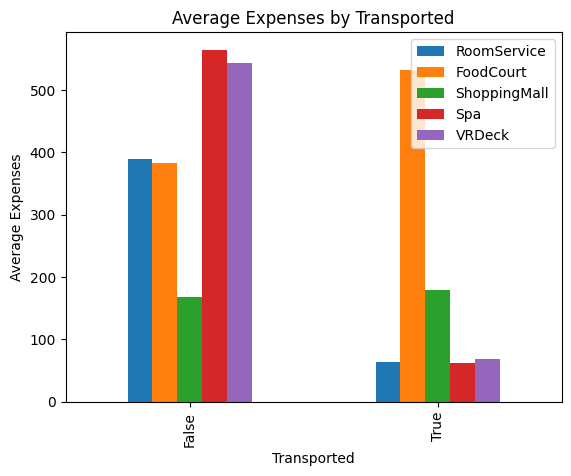

In [ ]:
import matplotlib.pyplot as plt

#RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
Expenses_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']


expenses_grouped = train.groupby('Transported')[Expenses_columns].mean()

plt.figure(figsize=(12, 6))
expenses_grouped.plot(kind='bar')
plt.xlabel('Transported')
plt.ylabel('Average Expenses')
plt.title('Average Expenses by Transported')
plt.legend(Expenses_columns)
plt.show()

In [ ]:
Expenses_columns = ['RoomService','FoodCourt','Spa','VRDeck','ShoppingMall']
train_dataset['Expenses'] = train_dataset.loc[:,Expenses_columns].sum(axis=1)

In [ ]:
#if "Cryosleep" = 1, Expense = 0
train_dataset.loc[:,['CryoSleep']] = train_dataset.apply(lambda x: True if x.Expenses == 0 and pd.isna(x.CryoSleep) else x,axis =1)

<Axes: xlabel='Transported', ylabel='Average Expenses'>

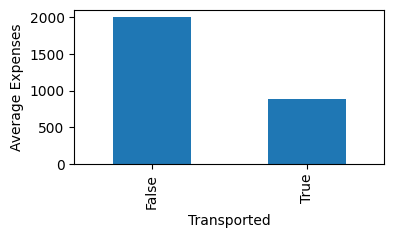

In [ ]:
expenses_grouped = train_dataset.groupby('Transported')["Expenses"].mean()
plt.figure(figsize=(4, 2))
plt.ylabel('Average Expenses')
expenses_grouped.plot(kind='bar')

In [ ]:
#HomePlanet
train_dataset.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64

In [ ]:
#Destination
train_dataset.groupby('Destination')['Transported'].mean()

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64

In [ ]:
#CryoSleep
train_dataset.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.814673
Name: Transported, dtype: float64

In [ ]:
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','Expenses','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group"]
transported=['Transported']

train_dataset = train_dataset[num_cols+cat_cols+transported].copy()
train_dataset.head()

,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,Expenses,Age,CryoSleep,Deck,Side,VIP,HomePlanet,Destination,Group,Transported
0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,False,B,P,False,Europa,TRAPPIST-1e,1,False
1,25.0,9.0,109.0,549.0,44.0,736.0,24.0,False,F,S,False,Earth,TRAPPIST-1e,1,True
2,0.0,3576.0,43.0,6715.0,49.0,10383.0,58.0,False,A,S,True,Europa,TRAPPIST-1e,2,False
3,371.0,1283.0,0.0,3329.0,193.0,5176.0,33.0,False,A,S,False,Europa,TRAPPIST-1e,2,False
4,151.0,70.0,303.0,565.0,2.0,1091.0,16.0,False,F,S,False,Earth,TRAPPIST-1e,1,True


## Missing values

### 方法(先補EDA觀察到)

In [ ]:

train_dataset.loc[((train_dataset['Deck']=='A')|(train_dataset['Deck']=='B')|(train_dataset['Deck']=='C')|(train_dataset['Deck']=='T')) & (train_dataset['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'
train_dataset.loc[((train_dataset['Deck']=='G')|(train_dataset['Group']==8)) & (train_dataset['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'
train_dataset.loc[(train_dataset['Deck']=='T') & (train_dataset['CryoSleep'].isna()), 'CryoSleep'] = False
train_dataset.loc[((train_dataset['HomePlanet']=='Earth')|(train_dataset['Deck']=='T')|(train_dataset['Group']==8)) & (train_dataset['VIP'].isna()), 'VIP'] = False
train_dataset.loc[(train_dataset['CryoSleep']==True)|(train_dataset['Age']<13), ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = 0
train_dataset.loc[(train_dataset[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)!=0) & (train_dataset['CryoSleep'].isna()), 'CryoSleep'] = False
train_dataset.loc[(train_dataset['Age']<18) & (train_dataset['VIP'].isna()), 'VIP'] = False


"\ntrain_dataset.loc[((train_dataset['Deck']=='A')|(train_dataset['Deck']=='B')|(train_dataset['Deck']=='C')|(train_dataset['Deck']=='T')) & (train_dataset['HomePlanet'].isna()), 'HomePlanet'] = 'Europa'\ntrain_dataset.loc[((train_dataset['Deck']=='G')|(train_dataset['Group']==8)) & (train_dataset['HomePlanet'].isna()), 'HomePlanet'] = 'Earth'\ntrain_dataset.loc[(train_dataset['Deck']=='T') & (train_dataset['CryoSleep'].isna()), 'CryoSleep'] = False\ntrain_dataset.loc[((train_dataset['HomePlanet']=='Earth')|(train_dataset['Deck']=='T')|(train_dataset['Group']==8)) & (train_dataset['VIP'].isna()), 'VIP'] = False\ntrain_dataset.loc[(train_dataset['CryoSleep']==True)|(train_dataset['Age']<13), ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = 0\ntrain_dataset.loc[(train_dataset[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)!=0) & (train_dataset['CryoSleep'].isna()), 'CryoSleep'] = False\ntrain_dataset.loc[(train_dataset['Age']<18) & (train_dataset['VIP']

In [ ]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

train_dataset[num_cols] = pd.DataFrame(num_imp.fit_transform(train_dataset[num_cols]),columns=num_cols)
train_dataset[cat_cols] = pd.DataFrame(cat_imp.fit_transform(train_dataset[cat_cols]),columns=cat_cols)

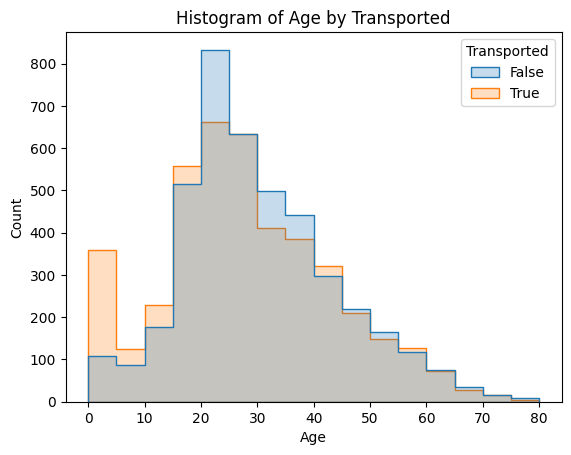

In [ ]:
import seaborn as sns

sns.histplot(data=train, x='Age', hue='Transported', element='step',binwidth=5)
plt.title('Histogram of Age by Transported')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
#Group the Age variable
train_dataset['Age_group'] = 0
train_dataset.loc[train_dataset['Age']  <= 5, 'Age_group'] = 1
train_dataset.loc[(train_dataset['Age'] > 5) & (train_dataset['Age'] <= 10), 'Age_group']=2
train_dataset.loc[(train_dataset['Age'] > 10) & (train_dataset['Age'] <= 20), 'Age_group']=3
train_dataset.loc[(train_dataset['Age'] > 20) & (train_dataset['Age'] <= 30), 'Age_group']=4
train_dataset.loc[(train_dataset['Age'] > 30) & (train_dataset['Age'] <= 50), 'Age_group']=5
train_dataset.loc[(train_dataset['Age'] > 50) & (train_dataset['Age'] <= 60), 'Age_group']=6
train_dataset.loc[(train_dataset['Age'] > 60) & (train_dataset['Age'] <= 70), 'Age_group']=7
train_dataset.loc[train_dataset['Age']  > 70, 'Age_group'] = 8

In [ ]:
train_dataset.groupby('Age_group')['Transported'].mean()

Age_group
1    0.757515
2    0.593607
3    0.517764
4    0.471373
5    0.479432
6    0.489362
7    0.491803
8    0.378378
Name: Transported, dtype: float64

In [ ]:
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','Expenses','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group","Age_group"]
transported=['Transported']
train_dataset = train_dataset[num_cols+cat_cols+transported].copy()
train_dataset

,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,Expenses,Age,CryoSleep,Deck,Side,VIP,HomePlanet,Destination,Group,Age_group,Transported
0,0.0,0.0,0.0,0.0,0.0,0.0,39.000000,False,B,P,False,Europa,TRAPPIST-1e,1,5,False
1,25.0,9.0,109.0,549.0,44.0,736.0,24.000000,False,F,S,False,Earth,TRAPPIST-1e,1,4,True
2,0.0,3576.0,43.0,6715.0,49.0,10383.0,58.000000,False,A,S,True,Europa,TRAPPIST-1e,2,6,False
3,371.0,1283.0,0.0,3329.0,193.0,5176.0,33.000000,False,A,S,False,Europa,TRAPPIST-1e,2,5,False
4,151.0,70.0,303.0,565.0,2.0,1091.0,16.000000,False,F,S,False,Earth,TRAPPIST-1e,1,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.0,0.0,0.0,0.0,0.0,0.0,34.000000,True,G,S,False,Earth,TRAPPIST-1e,2,5,NaN
12966,17.0,847.0,0.0,10.0,144.0,1018.0,42.000000,False,F,S,False,Earth,TRAPPIST-1e,1,5,NaN
12967,0.0,0.0,0.0,0.0,0.0,0.0,28.771969,True,D,P,False,Mars,55 Cancri e,1,4,NaN
12968,0.0,2680.0,0.0,0.0,523.0,3203.0,28.771969,False,D,P,False,Europa,TRAPPIST-1e,1,4,NaN


##Categorical Data Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder (handle_unknown='ignore',sparse_output = False)
temp_train = pd.DataFrame(ohe.fit_transform(train_dataset[cat_cols]),columns=ohe.get_feature_names_out())
train_dataset = train_dataset.drop(cat_cols,axis=1)
train_dataset = pd.concat([train_dataset,temp_train],axis=1)
train_dataset

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,Expenses,Age,Transported,CryoSleep_False,CryoSleep_True,...,Group_7,Group_8,Age_group_1,Age_group_2,Age_group_3,Age_group_4,Age_group_5,Age_group_6,Age_group_7,Age_group_8
0,0.0,0.0,0.0,0.0,0.0,0.0,39.000000,False,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,25.0,9.0,109.0,549.0,44.0,736.0,24.000000,True,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,3576.0,43.0,6715.0,49.0,10383.0,58.000000,False,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,371.0,1283.0,0.0,3329.0,193.0,5176.0,33.000000,False,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,151.0,70.0,303.0,565.0,2.0,1091.0,16.000000,True,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.0,0.0,0.0,0.0,0.0,0.0,34.000000,NaN,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12966,17.0,847.0,0.0,10.0,144.0,1018.0,42.000000,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12967,0.0,0.0,0.0,0.0,0.0,0.0,28.771969,NaN,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12968,0.0,2680.0,0.0,0.0,523.0,3203.0,28.771969,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Feature extraction

In [ ]:
train = train_dataset[train_dataset['Transported'].notnull()].copy()
test = train_dataset[train_dataset['Transported'].isnull()].drop("Transported",axis=1)
x = train.drop('Transported',axis=1)
y = train.Transported.astype(int)

In [ ]:
#Most correlated features
def get_redundant_pairs(x):
    pairs_to_drop = set()
    cols = x.columns
    for i in range(0, x.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=1):
    au_corr = x.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(x)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations:")
print(get_top_abs_correlations(train.select_dtypes(include=['int32','int64']), 10))

Top Absolute Correlations:
CryoSleep_False          CryoSleep_True             1.000000
VIP_False                VIP_True                   1.000000
Side_P                   Side_S                     1.000000
Destination_55 Cancri e  Destination_TRAPPIST-1e    0.783137
FoodCourt                Expenses                   0.742073
HomePlanet_Earth         HomePlanet_Europa          0.633221
Spa                      Expenses                   0.592425
VRDeck                   Expenses                   0.584706
Deck_G                   HomePlanet_Earth           0.581275
HomePlanet_Earth         HomePlanet_Mars            0.559658
dtype: float64


In [ ]:
drop_list=['ShoppingMall','Age','CryoSleep_False','VIP_False','Side_P','Destination_55 Cancri e','FoodCourt','HomePlanet_Earth']
x = x.drop(drop_list,axis=1)
test = test.drop(drop_list,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
print('x_train shape: ', x_train.shape)
print('x_valid shape: ', x_valid.shape)
print('y_train shape: ', y_train.shape)
print('y_valid shape: ',y_valid.shape)
x_train

x_train shape:  (6954, 35)
x_valid shape:  (1739, 35)
y_train shape:  (6954,)
y_valid shape:  (1739,)


,RoomService,Spa,VRDeck,Expenses,CryoSleep_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,...,Group_7,Group_8,Age_group_1,Age_group_2,Age_group_3,Age_group_4,Age_group_5,Age_group_6,Age_group_7,Age_group_8
2333,0.000000,656.0,0.0,711.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2589,0.000000,0.0,0.0,1226.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8302,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8177,222.897852,976.0,0.0,1267.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
500,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,14.000000,610.0,0.0,770.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5191,690.000000,762.0,428.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5390,158.000000,0.0,26.0,660.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
860,379.000000,0.0,0.0,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Select Model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms
random_state = 2
classifiers = [LogisticRegression(),SVC(),RandomForestClassifier(),GradientBoostingClassifier(),KNeighborsClassifier(),XGBClassifier()]

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x, y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Algorithm":["LogisticRegression","SVC", "RandomForest","GradientBoosting","KNeighboors","XGBClassifier"],"CrossValMeans":cv_means,"CrossValerrors": cv_std})
cv_res

,Algorithm,CrossValMeans,CrossValerrors
0,LogisticRegression,0.788569,0.011812
1,SVC,0.788568,0.014188
2,RandomForest,0.788566,0.008584
3,GradientBoosting,0.798118,0.014444
4,KNeighboors,0.760497,0.012738
5,XGBClassifier,0.803525,0.012524


# XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def score(m, x_train, y_train, x_valid, y_valid, train=True):
    if train:
        pred=m.predict(x_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(x_valid)
        print('Test Result:')
        print(f"Accuracy Score: {accuracy_score(y_valid, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_valid, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_valid, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_valid, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_valid, pred)}")


model = XGBClassifier()
model.fit(x_train, y_train,
     early_stopping_rounds=5,
     eval_set=[(x_valid, y_valid)],
     verbose=False)

score(model, x_train, y_train, x_valid, y_valid, train=False)

Test Result:
Accuracy Score: 79.18%
Precision Score: 78.73%
Recall Score: 80.52%
F1 score: 79.62%
Confusion Matrix:
 [[670 191]
 [171 707]]


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


## Feature importance

Spa: 0.08080064419647992
VRDeck: 0.07526745657425513
RoomService: 0.07298976187737258
Expenses: 0.05931209018750716
CryoSleep_True: 0.03621304497871849
Deck_E: 0.016749108478085785
Side_S: 0.01324053836420106
Destination_TRAPPIST-1e: 0.009743471758886457
HomePlanet_Mars: 0.0075002875877142276
Deck_C: 0.007074657770620029


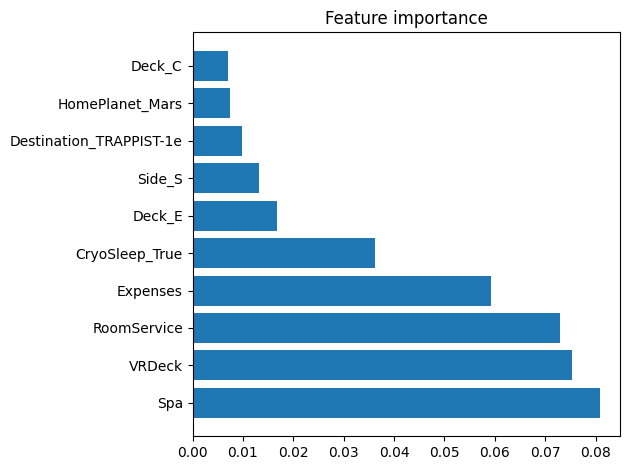

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

# Get permutation materiality
result = permutation_importance(model, x, y, scoring="accuracy", n_repeats=10)
sorted_indices = np.argsort(result.importances_mean)[::-1]

# Show the most important features and their respective importance values
top_features = x.columns[sorted_indices[:10]]
top_importances = result.importances_mean[sorted_indices[:10]]
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")


fig, ax = plt.subplots()
ax.barh(top_features, top_importances)
ax.set_title("Feature importance")
fig.tight_layout()
plt.show()

# Hyper-parameter tuning with Optuna

In [ ]:
# Top 10 features
x = x[top_features]
x_valid = x_valid[top_features]
x_train = x_train[top_features]
test = test[top_features]

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [ ]:
import optuna
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier



#define objective function for hyperparameter optimization using optuna
def objective(trial):

  #define hyperparameters to optimize for
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
      'max_depth': trial.suggest_int('max_depth', 3, 10),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'subsample': trial.suggest_uniform('subsample', 0.1, 1),
      'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
      #'gamma': trial.suggest_uniform('gamma', 0, 1),
      'alpha': trial.suggest_loguniform('alpha', 2, 5),
      'lambda': trial.suggest_loguniform('lambda', 2, 5),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 300)
  }

#create XGBClassifier model with optimized hyperparameters
  model = XGBClassifier(**params, random_state=0)

  #evaluate model using cross-validation
  score = cross_val_score(model, x, y, cv=5).mean()

  return score

#run hyperparameter optimization with optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

[I 2023-12-27 12:27:48,450] A new study created in memory with name: no-name-3076875f-a2d1-4916-9b9b-d6461c943ef5
[I 2023-12-27 12:28:11,991] Trial 0 finished with value: 0.7827017895156867 and parameters: {'n_estimators': 479, 'max_depth': 4, 'learning_rate': 0.053701312110675976, 'subsample': 0.6549652300178618, 'colsample_bytree': 0.5509549306532204, 'alpha': 2.465822666579891, 'lambda': 2.854783636053656, 'min_child_weight': 90}. Best is trial 0 with value: 0.7827017895156867.
[I 2023-12-27 12:28:26,394] Trial 1 finished with value: 0.7448554153644377 and parameters: {'n_estimators': 930, 'max_depth': 10, 'learning_rate': 0.25556179307519317, 'subsample': 0.5267099240069728, 'colsample_bytree': 0.709224329641424, 'alpha': 2.2946299306694398, 'lambda': 4.6302254059041905, 'min_child_weight': 244}. Best is trial 0 with value: 0.7827017895156867.
[I 2023-12-27 12:28:27,984] Trial 2 finished with value: 0.780975998401261 and parameters: {'n_estimators': 371, 'max_depth': 8, 'learning_r

In [ ]:
#get best hyperparameters
best_params = study.best_params
print(f'Best hyperparameters: {best_params}')

Best hyperparameters: {'n_estimators': 508, 'max_depth': 5, 'learning_rate': 0.044214673426492025, 'subsample': 0.6821618461390018, 'colsample_bytree': 0.8815144707849184, 'alpha': 3.1197206394717885, 'lambda': 2.7241723285748782, 'min_child_weight': 6}


In [ ]:
from optuna.visualization import plot_optimization_history

plotly_config = {"staticPlot": True}

fig = plot_optimization_history(study)
fig.show(config=plotly_config)

In [ ]:
from optuna.visualization import plot_param_importances

fig = plot_param_importances(study)
fig.show(config=plotly_config)

# Model Evaluation

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay



def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    # Labels, title and ticks
    label_font = {'size':'12'}  # Adjust to fit
    ax1.set_xlabel('Predicted label', fontdict=label_font)
    ax1.set_ylabel('True label', fontdict=label_font)

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False,cmap=plt.cm.Blues, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data',fontsize=14)
    ax1.grid(False)

    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')

    # Hide the axes
    ax2.axis('off')
    # set the title
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=14)


    plt.tight_layout()
    plt.show()

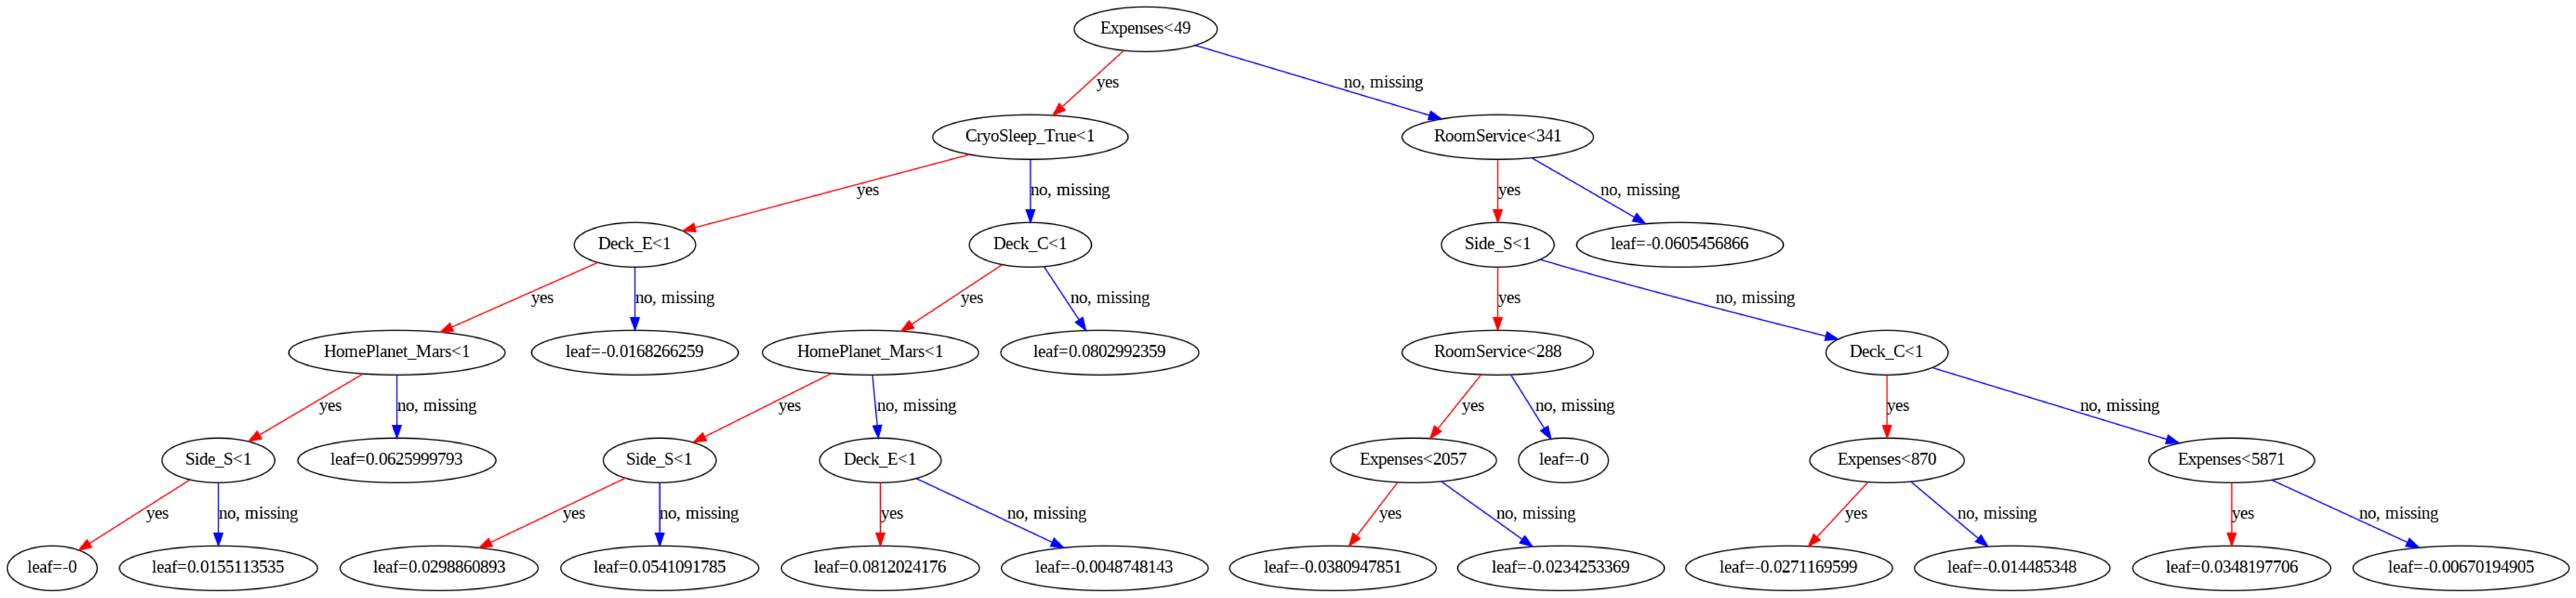

In [ ]:
from xgboost import plot_tree
import matplotlib

model = XGBClassifier(**best_params, random_state=0)
model.fit(x, y)

plot_tree(model)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      3454
           1       0.81      0.86      0.84      3500

    accuracy                           0.83      6954
   macro avg       0.83      0.83      0.83      6954
weighted avg       0.83      0.83      0.83      6954


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       861
           1       0.80      0.85      0.82       878

    accuracy                           0.82      1739
   macro avg       0.82      0.82      0.82      1739
weighted avg       0.82      0.82      0.82      1739





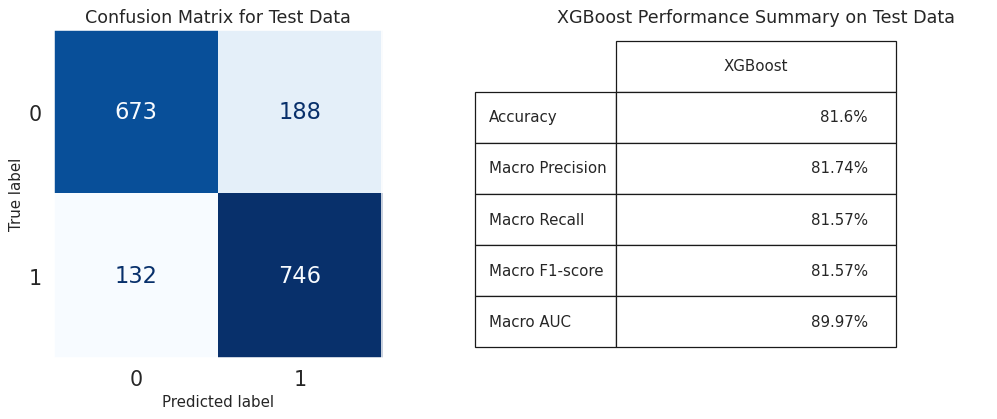

In [ ]:
model_evaluation(model, x_train, x_valid, y_train, y_valid, 'XGBoost')

#Final result (test.csv)

In [ ]:

predictions = model.predict(test)
submit['Transported'] = predictions
#This converts the numbers to True/False values
submit['Transported']=submit['Transported']>0.5
submit.to_csv('final_result.csv', index=False)